### 1.1Gonogo


| Age Group | N | Gender1_N | Gender1_% | Age_Mean±SD | Go_ACC_% | Nogo_ACC_% | RT Mean±SD (ms) | d-prime Mean±SD |
|:----------|--:|----------:|----------:|------------:|---------:|-----------:|----------------:|----------------:|
| 6 | 80 | 43 | 53.75% | 6.41±0.23 | 90.47% | 70.90% | 566.88±55.73 | 1.94±0.35 |
| 7 | 92 | 47 | 51.09% | 7.34±0.19 | 92.90% | 75.12% | 534.26±65.70 | 2.30±0.51 |
| 8 | 98 | 52 | 53.06% | 8.46±0.17 | 94.01% | 79.98% | 506.81±58.45 | 2.57±0.56 |
| 9 | 90 | 50 | 55.56% | 9.48±0.20 | 96.37% | 84.96% | 490.91±59.04 | 3.05±0.58 |
| 10 | 87 | 46 | 52.87% | 10.47±0.17 | 97.18% | 86.93% | 475.65±58.30 | 3.20±0.48 |
| 11 | 81 | 47 | 58.02% | 11.52±0.21 | 98.26% | 89.89% | 458.02±61.12 | 3.56±0.55 |
| 12 | 86 | 45 | 52.33% | 12.56±0.19 | 98.29% | 91.70% | 428.11±55.33 | 3.67±0.51 |
| 13 | 89 | 48 | 53.93% | 13.56±0.19 | 98.28% | 94.04% | 414.57±59.39 | 3.85±0.53 |
| 14 | 74 | 39 | 52.70% | 14.55±0.20 | 98.29% | 92.20% | 411.46±61.39 | 3.74±0.55 |
| 15 | 98 | 57 | 58

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_71975/1390131862.py:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-d" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(xs, means_rt.values, '-d', markersize=3,


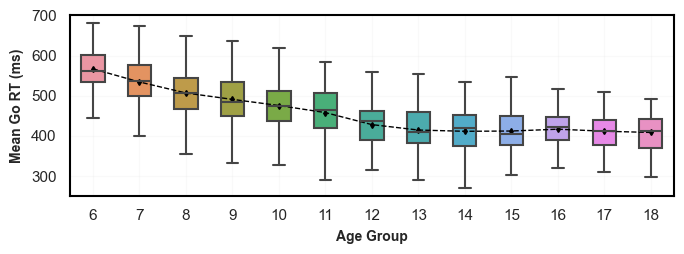

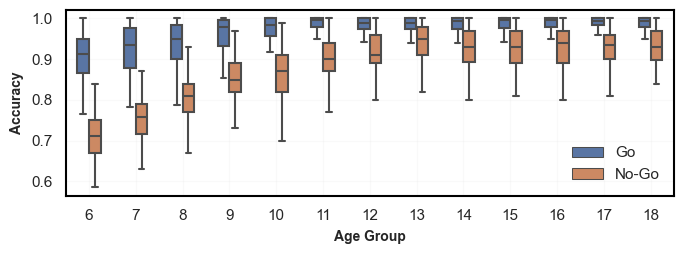

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_71975/1390131862.py:132: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-d" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(xs, means_dprime.values, '-d', markersize=3,


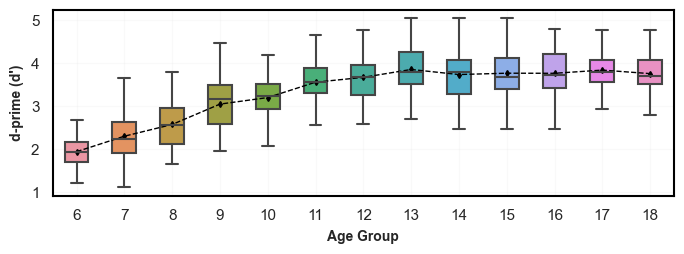

/Users/zhangtongyi/Vs_code/venv2_ml/lib/python3.10/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_71975/1390131862.py:204: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


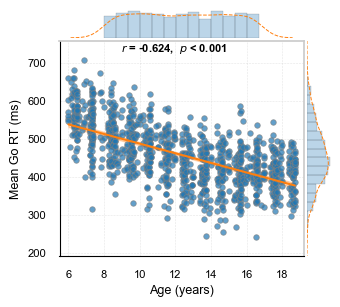

/Users/zhangtongyi/Vs_code/venv2_ml/lib/python3.10/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_71975/1390131862.py:268: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


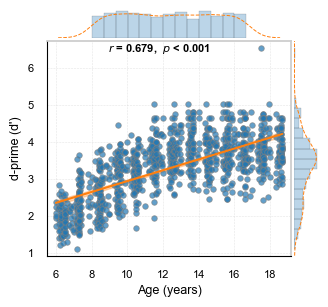

=== 统计分析摘要 ===
样本量: 1122
年龄范围: 6.0 – 18.7 years
反应时范围: 241.0 – 709.6 ms
d-prime范围: 1.11 – 6.54

--- Age vs RT 相关分析 ---
Pearson 相关系数: r = -0.624
95% 置信区间: [-0.659, -0.587]
显著性: $p$ < 0.001
效应大小: Large

--- Age vs d-prime 相关分析 ---
Pearson 相关系数: r = 0.679
95% 置信区间: [0.646, 0.709]
显著性: $p$ < 0.001
效应大小: Large

=== 数据输出 ===
效应量分析结果已保存至: ./output/agegroup_effect_sizes-Gonogo.xlsx
包含 d-prime 的完整数据已保存至: ./output/Gonogo_data_with_dprime.xlsx
所有图表已保存至 ./output/ 文件夹


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# define a simple color palette for plotting
palette = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'neutral_dark': '#000000'
}

# 1. 读取已汇总的 Go/No-Go 数据
input_path = 'Gonogo-baseline.xlsx'
df = pd.read_excel(input_path)

# 2. 重命名列：使用 Excel 中已有的 d-prime 数据，而非在代码中计算
df.rename(columns={
    "Gonogo_d'":    "Gonogo_dprime",
    "Go_RT_ms":     "RT"
}, inplace=True)

# 确认字段包含：Subject, Go_ACC, Nogo_ACC, RT, Gonogo_dprime, Age, Gender, Age Group

# 3. 准备分组数据，并保留 Age 以便后续整体统计
df_subj = df[['Subject', 'Age Group', 'Gender', 'Age']].drop_duplicates(subset='Subject')

# 4. 生成并打印横断面三线表 (包含 d-prime)
total_counts   = df_subj.groupby('Age Group')['Subject'].nunique().rename('N')
gender1_counts = df_subj[df_subj['Gender'] == 1].groupby('Age Group')['Subject'].nunique().rename('Gender1_N')
gender1_pct    = (gender1_counts / total_counts * 100).rename('Gender1_%')

go_acc_stats   = df.groupby('Age Group')['Go_ACC'].mean().rename('Go_ACC_%') * 100
nogo_acc_stats = df.groupby('Age Group')['Nogo_ACC'].mean().rename('Nogo_ACC_%') * 100

go_rt_stats = df.groupby('Age Group').agg(
    RT_mean=('RT', 'mean'),
    RT_std =('RT', 'std')
)

dprime_stats = df.groupby('Age Group').agg(
    dprime_mean=('Gonogo_dprime', 'mean'),
    dprime_std =('Gonogo_dprime', 'std')
)

age_stats = df.groupby('Age Group')['Age'].agg(Age_mean='mean', Age_std='std')
age_mean_sd = age_stats.apply(lambda row: f"{row['Age_mean']:.2f}±{row['Age_std']:.2f}", axis=1).rename('Age_Mean±SD')

table = (pd.concat([total_counts, gender1_counts, gender1_pct, age_mean_sd], axis=1)
         .join(go_acc_stats)
         .join(nogo_acc_stats)
         .join(go_rt_stats)
         .join(dprime_stats)
         ).fillna(0)

print('\n| Age Group | N | Gender1_N | Gender1_% | Age_Mean±SD | Go_ACC_% | Nogo_ACC_% | RT Mean±SD (ms) | d-prime Mean±SD |')
print('|:----------|--:|----------:|----------:|------------:|---------:|-----------:|----------------:|----------------:|')
for age, row in table.iterrows():
    print(f'| {age} | {int(row["N"])} | {int(row["Gender1_N"])} | '
          f'{row["Gender1_%"]:.2f}% | {row["Age_Mean±SD"]} | '
          f'{row["Go_ACC_%"]:.2f}% | '
          f'{row["Nogo_ACC_%"]:.2f}% | {row["RT_mean"]:.2f}±{row["RT_std"]:.2f} | '
          f'{row["dprime_mean"]:.2f}±{row["dprime_std"]:.2f} |')

# 5. 增加打印：总人数、Age 的均值±标准差、Gender1 人数和占比
total_n = df_subj['Subject'].nunique()
overall_age_mean = df_subj['Age'].mean()
overall_age_std  = df_subj['Age'].std()
gender1_n = df_subj[df_subj['Gender'] == 1]['Subject'].nunique()
gender1_pct = gender1_n / total_n * 100

print("\n=== Overall Summary ===")
print(f"Total subjects (N): {total_n}")
print(f"Age, M ± SD: {overall_age_mean:.2f} ± {overall_age_std:.2f}")
print(f"Gender1 (Male) n (%): {gender1_n} ({gender1_pct:.2f}%)")

# 6. 可视化：Go RT by Age Group
sns.set(style='whitegrid')
age_groups = sorted(df['Age Group'].unique())

plt.figure(figsize=(7,2.7))
ax1 = sns.boxplot(x='Age Group', y='RT', data=df,
                  order=age_groups, showfliers=False, width=0.5)
means_rt = df.groupby('Age Group')['RT'].mean().loc[age_groups]
xs = np.arange(len(age_groups))
ax1.plot(xs, means_rt.values, '-d', markersize=3,
         linewidth=1, linestyle='--', color='black')
ax1.set_xlabel('Age Group', fontsize=10, labelpad=5, fontweight='bold')
ax1.set_ylabel('Mean Go RT (ms)', fontsize=10, labelpad=5, fontweight='bold')
ax1.grid(True, alpha=0.1)
for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
plt.tight_layout()
os.makedirs('./output', exist_ok=True)
plt.savefig('./output/go_rt_by_agegroup-baseline.png', dpi=800, bbox_inches='tight')
plt.show()

# 7. 可视化：Go ACC 与 No-Go ACC by Age Group
df_acc = df[['Subject','Age Group','Go_ACC','Nogo_ACC']].melt(
    id_vars=['Subject','Age Group'],
    value_vars=['Go_ACC','Nogo_ACC'],
    var_name='Type',
    value_name='ACC'
)
df_acc['Type'] = df_acc['Type'].map({'Go_ACC':'Go', 'Nogo_ACC':'No-Go'})

plt.figure(figsize=(7,2.7))
ax2 = sns.boxplot(
    x='Age Group', y='ACC', hue='Type', data=df_acc,
    order=age_groups, showfliers=False, width=0.5
)
ax2.set_xlabel('Age Group', fontsize=10, labelpad=5, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=10, labelpad=5, fontweight='bold')
ax2.legend(title='', frameon=False)
ax2.grid(True, alpha=0.1)
for spine in ax2.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
plt.tight_layout()
plt.savefig('./output/acc_box_by_agegroup-baseline.png', dpi=800, bbox_inches='tight')
plt.show()

# 8. 可视化：d-prime by Age Group
plt.figure(figsize=(7,2.7))
ax3 = sns.boxplot(x='Age Group', y='Gonogo_dprime', data=df,
                  order=age_groups, showfliers=False, width=0.5)
means_dprime = df.groupby('Age Group')['Gonogo_dprime'].mean().loc[age_groups]
xs = np.arange(len(age_groups))
ax3.plot(xs, means_dprime.values, '-d', markersize=3,
         linewidth=1, linestyle='--', color='black')
ax3.set_xlabel('Age Group', fontsize=10, labelpad=5, fontweight='bold')
ax3.set_ylabel("d-prime (d')", fontsize=10, labelpad=5, fontweight='bold')
ax3.grid(True, alpha=0.1)
for spine in ax3.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
plt.tight_layout()
plt.savefig('./output/dprime_by_agegroup-baseline.png', dpi=800, bbox_inches='tight')
plt.show()

# 9. Pearson 相关分析与回归可视化 (Age vs RT)
summary = df[['Subject','Age','RT']].rename(columns={'RT':'Mean_RT'})

r, p = pearsonr(summary['Age'], summary['Mean_RT'])
n = len(summary)
z = np.arctanh(r)
se = 1 / np.sqrt(n - 3)
delta = 1.96 * se
r_lower, r_upper = np.tanh(z - delta), np.tanh(z + delta)

fig = plt.figure(figsize=(3.5,3.2))
gs = fig.add_gridspec(4,4, height_ratios=[0.4,1,1,1], width_ratios=[1,1,1,0.3],
                      hspace=0.05, wspace=0.05)
ax_top   = fig.add_subplot(gs[0,0:3])
ax_main  = fig.add_subplot(gs[1:4,0:3])
ax_right = fig.add_subplot(gs[1:4,3], sharey=ax_main)

ax_main.scatter(summary['Age'], summary['Mean_RT'],
                s=16, c=palette['primary'], alpha=0.7,
                edgecolors="grey", linewidths=0.6, zorder=3)
x, y = summary['Age'].values, summary['Mean_RT'].values
coeffs = np.polyfit(x, y, 1)
xs_line = np.linspace(x.min(), x.max(), 100)
ys_line = np.polyval(coeffs, xs_line)
y_pred = np.polyval(coeffs, x)
mse = np.mean((y - y_pred)**2)
se_pred = np.sqrt(mse * (1/len(x) + (xs_line - x.mean())**2 / np.sum((x - x.mean())**2)))
ci_u = ys_line + 1.96 * se_pred
ci_l = ys_line - 1.96 * se_pred
ax_main.fill_between(xs_line, ci_l, ci_u,
                     color=palette['secondary'], alpha=0.3, zorder=2)
ax_main.plot(xs_line, ys_line,
             color=palette['secondary'], linewidth=1.5, zorder=4)

ax_top.hist(summary['Age'], bins=len(age_groups), density=True,
            alpha=0.3, color=palette['primary'], edgecolor='black', linewidth=0.3)
sns.kdeplot(summary['Age'], ax=ax_top,
            color=palette['secondary'], linewidth=0.7, linestyle='--')
ax_top.axis('off')

ax_right.hist(summary['Mean_RT'], bins=20, density=True, orientation='horizontal',
              alpha=0.3, color=palette['primary'], edgecolor='black', linewidth=0.3)
sns.kdeplot(summary['Mean_RT'], ax=ax_right, vertical=True,
            color=palette['secondary'], linewidth=0.7, linestyle='--')
ax_right.axis('off')

ax_main.set_xlabel('Age (years)', fontsize=9, color=palette['neutral_dark'])
ax_main.set_ylabel('Mean Go RT (ms)', fontsize=9, color=palette['neutral_dark'])
ax_main.set_xlim(x.min()-0.5, x.max()+0.5)
ax_main.set_ylim(y.min()-50, y.max()+50)
ax_main.tick_params(axis='both', which='major', labelsize=8, colors=palette['neutral_dark'])
p_text = "$p$ < 0.001" if p < 0.001 else f"$p$ = {p:.3f}"
stats_text = f"$r$ = {r:.3f},  {p_text}"
ax_main.text(0.25, 0.95, stats_text, transform=ax_main.transAxes,
             fontsize=8, fontweight='bold', color=palette['neutral_dark'])
ax_main.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
for spine in ['left','bottom']:
    ax_main.spines[spine].set_linewidth(0.8)
    ax_main.spines[spine].set_color(palette['neutral_dark'])

plt.tight_layout()
plt.savefig('./output/age_rt_correlation-baseline.png', dpi=600, bbox_inches='tight')
plt.show()

# 10. 新增：Age vs d-prime 相关分析
summary_dprime = df[['Subject','Age','Gonogo_dprime']].rename(columns={'Gonogo_dprime':'Mean_dprime'})

r_dprime, p_dprime = pearsonr(summary_dprime['Age'], summary_dprime['Mean_dprime'])
n_dprime = len(summary_dprime)
z_dprime = np.arctanh(r_dprime)
se_dprime = 1 / np.sqrt(n_dprime - 3)
delta_dprime = 1.96 * se_dprime
r_lower_dprime, r_upper_dprime = np.tanh(z_dprime - delta_dprime), np.tanh(z_dprime + delta_dprime)

fig = plt.figure(figsize=(3.5,3.2))
gs = fig.add_gridspec(4,4, height_ratios=[0.4,1,1,1], width_ratios=[1,1,1,0.3],
                      hspace=0.05, wspace=0.05)
ax_top   = fig.add_subplot(gs[0,0:3])
ax_main  = fig.add_subplot(gs[1:4,0:3])
ax_right = fig.add_subplot(gs[1:4,3], sharey=ax_main)

ax_main.scatter(summary_dprime['Age'], summary_dprime['Mean_dprime'],
                s=16, c=palette['primary'], alpha=0.7,
                edgecolors="grey", linewidths=0.6, zorder=3)
x, y = summary_dprime['Age'].values, summary_dprime['Mean_dprime'].values
coeffs = np.polyfit(x, y, 1)
xs_line = np.linspace(x.min(), x.max(), 100)
ys_line = np.polyval(coeffs, xs_line)
y_pred = np.polyval(coeffs, x)
mse = np.mean((y - y_pred)**2)
se_pred = np.sqrt(mse * (1/len(x) + (xs_line - x.mean())**2 / np.sum((x - x.mean())**2)))
ci_u = ys_line + 1.96 * se_pred
ci_l = ys_line - 1.96 * se_pred
ax_main.fill_between(xs_line, ci_l, ci_u,
                     color=palette['secondary'], alpha=0.3, zorder=2)
ax_main.plot(xs_line, ys_line,
             color=palette['secondary'], linewidth=1.5, zorder=4)

ax_top.hist(summary_dprime['Age'], bins=len(age_groups), density=True,
            alpha=0.3, color=palette['primary'], edgecolor='black', linewidth=0.3)
sns.kdeplot(summary_dprime['Age'], ax=ax_top,
            color=palette['secondary'], linewidth=0.7, linestyle='--')
ax_top.axis('off')

ax_right.hist(summary_dprime['Mean_dprime'], bins=20, density=True, orientation='horizontal',
              alpha=0.3, color=palette['primary'], edgecolor='black', linewidth=0.3)
sns.kdeplot(summary_dprime['Mean_dprime'], ax=ax_right, vertical=True,
            color=palette['secondary'], linewidth=0.7, linestyle='--')
ax_right.axis('off')

ax_main.set_xlabel('Age (years)', fontsize=9, color=palette['neutral_dark'])
ax_main.set_ylabel("d-prime (d')",fontsize=9,color=palette['neutral_dark'])
ax_main.set_xlim(x.min()-0.5, x.max()+0.5)
ax_main.set_ylim(y.min()-0.2, y.max()+0.2)
ax_main.tick_params(axis='both', which='major', labelsize=8, colors=palette['neutral_dark'])
p_text_dprime = "$p$ < 0.001" if p_dprime < 0.001 else f"$p$ = {p_dprime:.3f}"
stats_text_dprime = f"$r$ = {r_dprime:.3f},  {p_text_dprime}"
ax_main.text(0.25, 0.95, stats_text_dprime, transform=ax_main.transAxes,
             fontsize=8, fontweight='bold', color=palette['neutral_dark'])
ax_main.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
for spine in ['left','bottom']:
    ax_main.spines[spine].set_linewidth(0.8)
    ax_main.spines[spine].set_color(palette['neutral_dark'])

plt.tight_layout()
plt.savefig('./output/age_dprime_correlation-baseline.png', dpi=600, bbox_inches='tight')
plt.show()

# 11. 输出统计摘要
print("=== 统计分析摘要 ===")
print(f"样本量: {n}")
print(f"年龄范围: {summary['Age'].min():.1f} – {summary['Age'].max():.1f} years")
print(f"反应时范围: {summary['Mean_RT'].min():.1f} – {summary['Mean_RT'].max():.1f} ms")
print(f"d-prime范围: {summary_dprime['Mean_dprime'].min():.2f} – {summary_dprime['Mean_dprime'].max():.2f}")

print("\n--- Age vs RT 相关分析 ---")
print(f"Pearson 相关系数: r = {r:.3f}")
print(f"95% 置信区间: [{r_lower:.3f}, {r_upper:.3f}]")
print(f"显著性: {p_text}")
print(f"效应大小: {'Large' if abs(r)>0.5 else 'Medium' if abs(r)>0.3 else 'Small'}")

print(f"\n--- Age vs d-prime 相关分析 ---")
print(f"Pearson 相关系数: r = {r_dprime:.3f}")
print(f"95% 置信区间: [{r_lower_dprime:.3f}, {r_upper_dprime:.3f}]")
print(f"显著性: {p_text_dprime}")
print(f"效应大小: {'Large' if abs(r_dprime)>0.5 else 'Medium' if abs(r_dprime)>0.3 else 'Small'}")

# 12. Age Group 差异检验与效应量计算 (相邻年龄组) - 包含 d-prime
metrics = ['RT', 'Go_ACC', 'Nogo_ACC', 'Gonogo_dprime']
pairs = []
for i in range(len(age_groups) - 1):
    g1, g2 = age_groups[i], age_groups[i+1]
    df1 = df[df['Age Group'] == g1]
    df2 = df[df['Age Group'] == g2]
    n1, n2 = len(df1), len(df2)
    for m in metrics:
        x1, x2 = df1[m].dropna(), df2[m].dropna()
        m1, m2 = x1.mean(), x2.mean()
        sd1, sd2 = x1.std(ddof=1), x2.std(ddof=1)
        pooled_sd = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2) / (n1 + n2 - 2))
        d = (m2 - m1) / pooled_sd
        pairs.append({'Group1': g1, 'Group2': g2, 'Metric': m, 'n1': n1, 'n2': n2, 'd': d})

df_pair = pd.DataFrame(pairs)

# 保存效应量数据到新的 Excel 文件
df_pair.to_excel('./output/agegroup_effect_sizes-Gonogo.xlsx', index=False)

# 13. 保存包含 d-prime 的完整数据
df_output = df[['Subject', 'Age Group', 'Gender', 'Age', 'Go_ACC', 'Nogo_ACC', 'RT', 'Gonogo_dprime']]
df_output.to_excel('./output/Gonogo_data_with_dprime.xlsx', index=False)

print(f"\n=== 数据输出 ===")
print("效应量分析结果已保存至: ./output/agegroup_effect_sizes-Gonogo.xlsx")
print("包含 d-prime 的完整数据已保存至: ./output/Gonogo_data_with_dprime.xlsx")
print("所有图表已保存至 ./output/ 文件夹")

### 1.2Stroop

/Users/zhangtongyi/Vs_code/venv2_ml/lib/python3.10/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


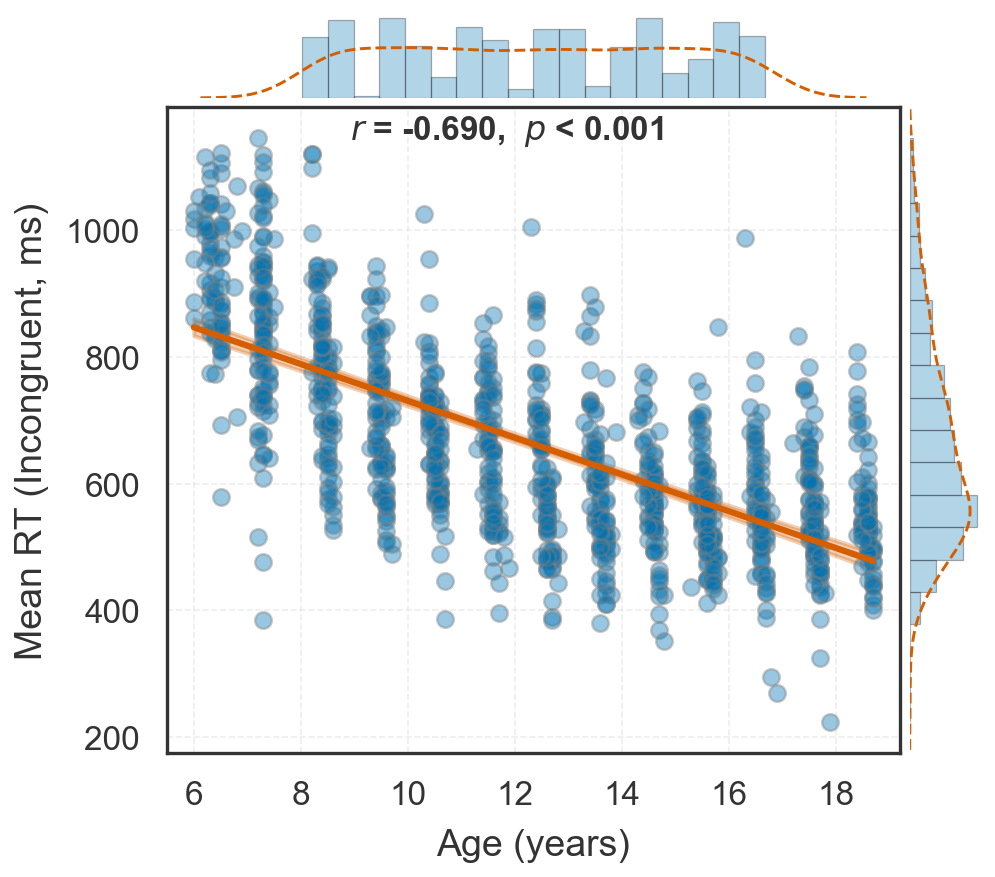

### Descriptive Statistics
| Age Group | N | Incongruent_M | Incongruent_SD | Congruent_M | Congruent_SD | Neutral_M | Neutral_SD | Interference_M | Interference_SD |
|---|---|---|---|---|---|---|---|---|---|
| 6 | 80.0 | 932.57 | 104.19 | 924.14 | 105.9 | 927.13 | 113.82 | 8.43 | 60.56 |
| 7 | 92.0 | 838.67 | 141.22 | 823.11 | 135.44 | 837.77 | 146.78 | 15.56 | 52.78 |
| 8 | 98.0 | 773.4 | 125.16 | 730.81 | 130.16 | 735.48 | 119.22 | 42.59 | 64.13 |
| 9 | 90.0 | 703.53 | 111.17 | 659.31 | 102.5 | 688.25 | 104.66 | 44.21 | 56.73 |
| 10 | 87.0 | 669.91 | 99.64 | 628.42 | 95.45 | 633.81 | 86.02 | 41.49 | 65.76 |
| 11 | 81.0 | 641.77 | 106.28 | 600.99 | 96.85 | 626.41 | 91.03 | 40.78 | 67.05 |
| 12 | 86.0 | 610.95 | 124.99 | 573.04 | 88.83 | 577.29 | 87.35 | 37.91 | 64.11 |
| 13 | 89.0 | 589.98 | 110.53 | 564.32 | 95.59 | 567.92 | 85.83 | 25.66 | 59.36 |
| 14 | 74.0 | 573.89 | 91.97 | 561.18 | 82.06 | 567.99 | 85.06 | 12.7 | 51.95 |
| 15 | 98.0 | 556.92 | 84.14 | 552.75 | 100.57 | 563.7 |

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_46295/327068454.py:197: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xs, means.values, '-o', markersize=4, linewidth=1,


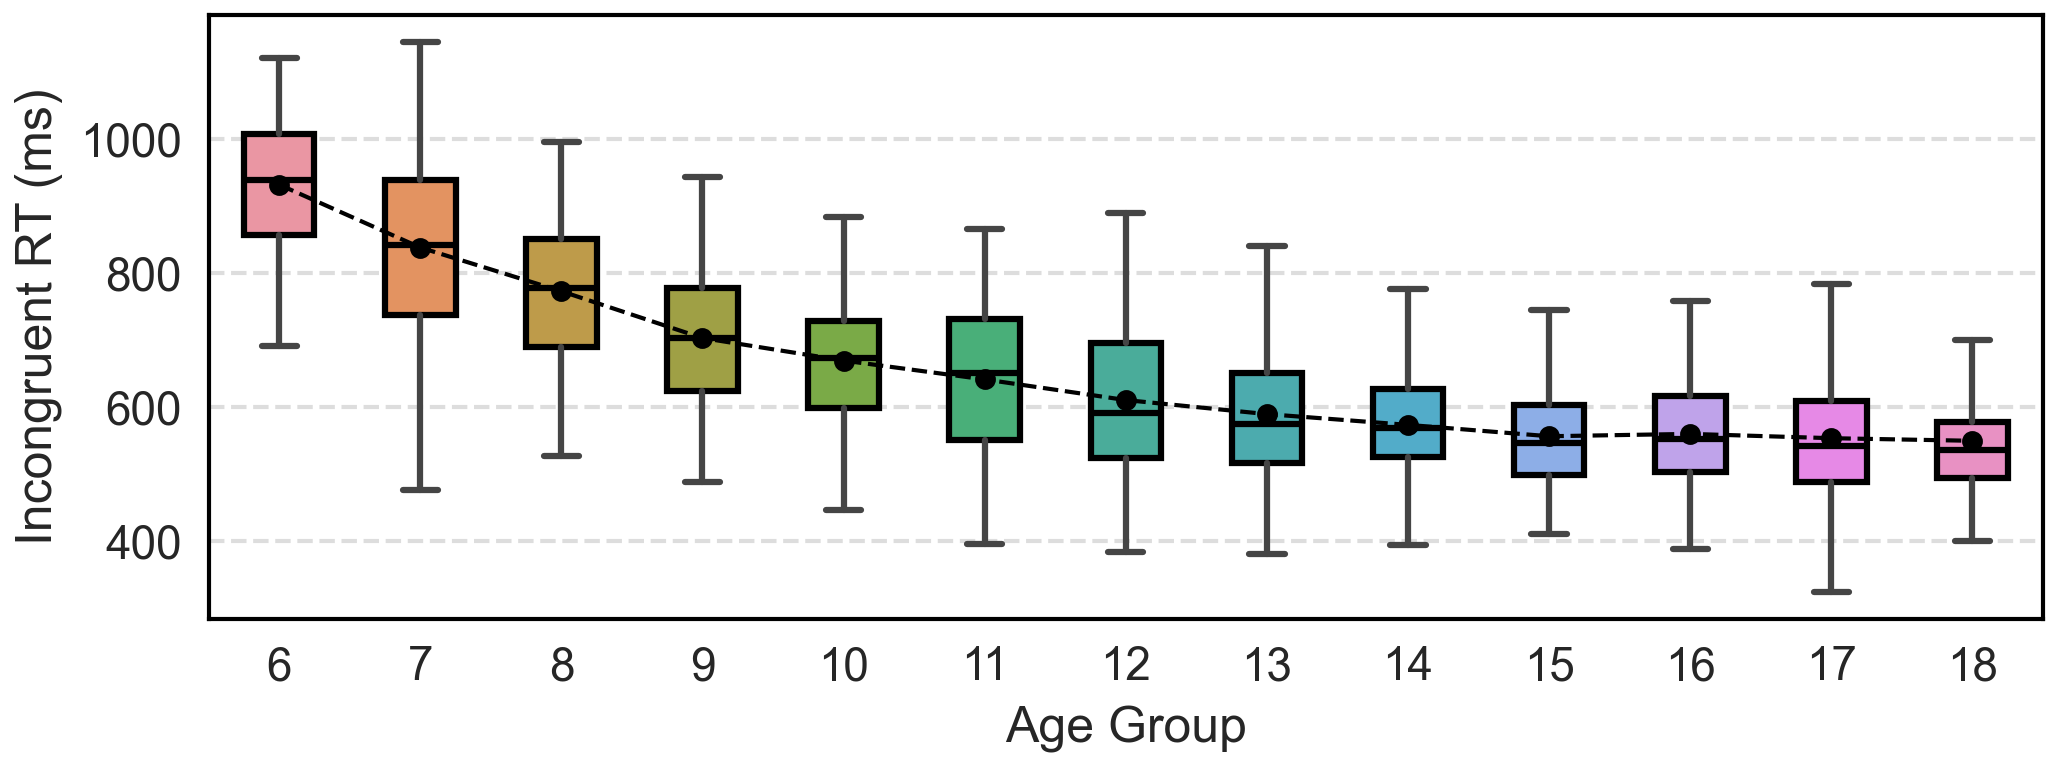

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_46295/327068454.py:197: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xs, means.values, '-o', markersize=4, linewidth=1,


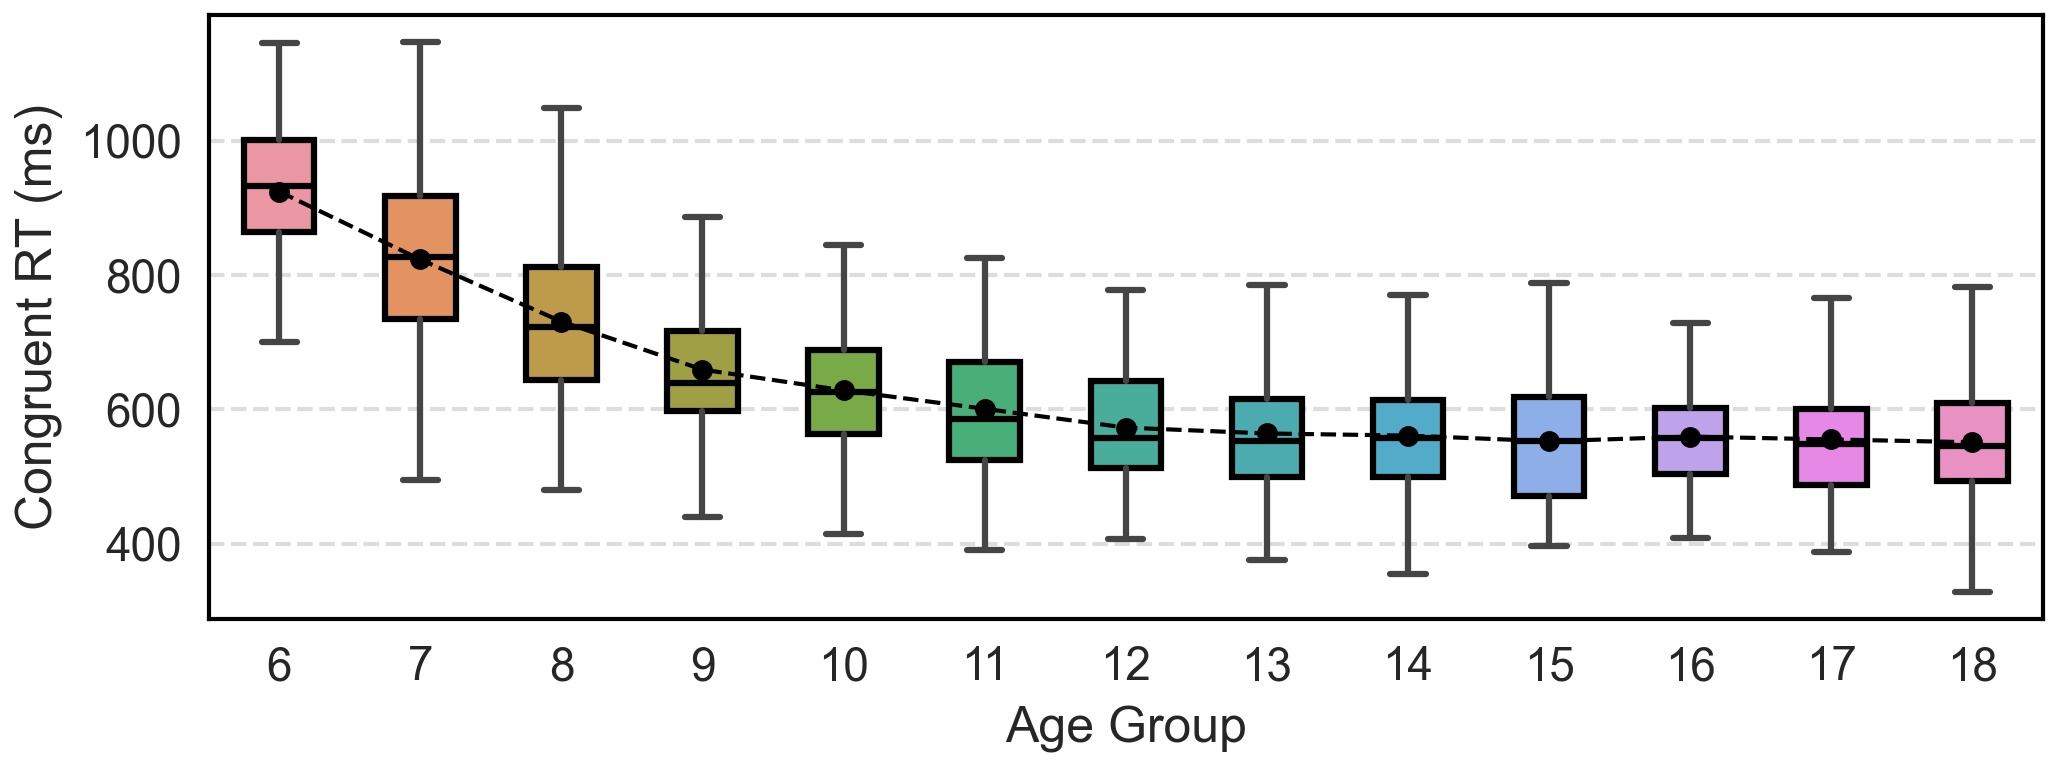

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_46295/327068454.py:197: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xs, means.values, '-o', markersize=4, linewidth=1,


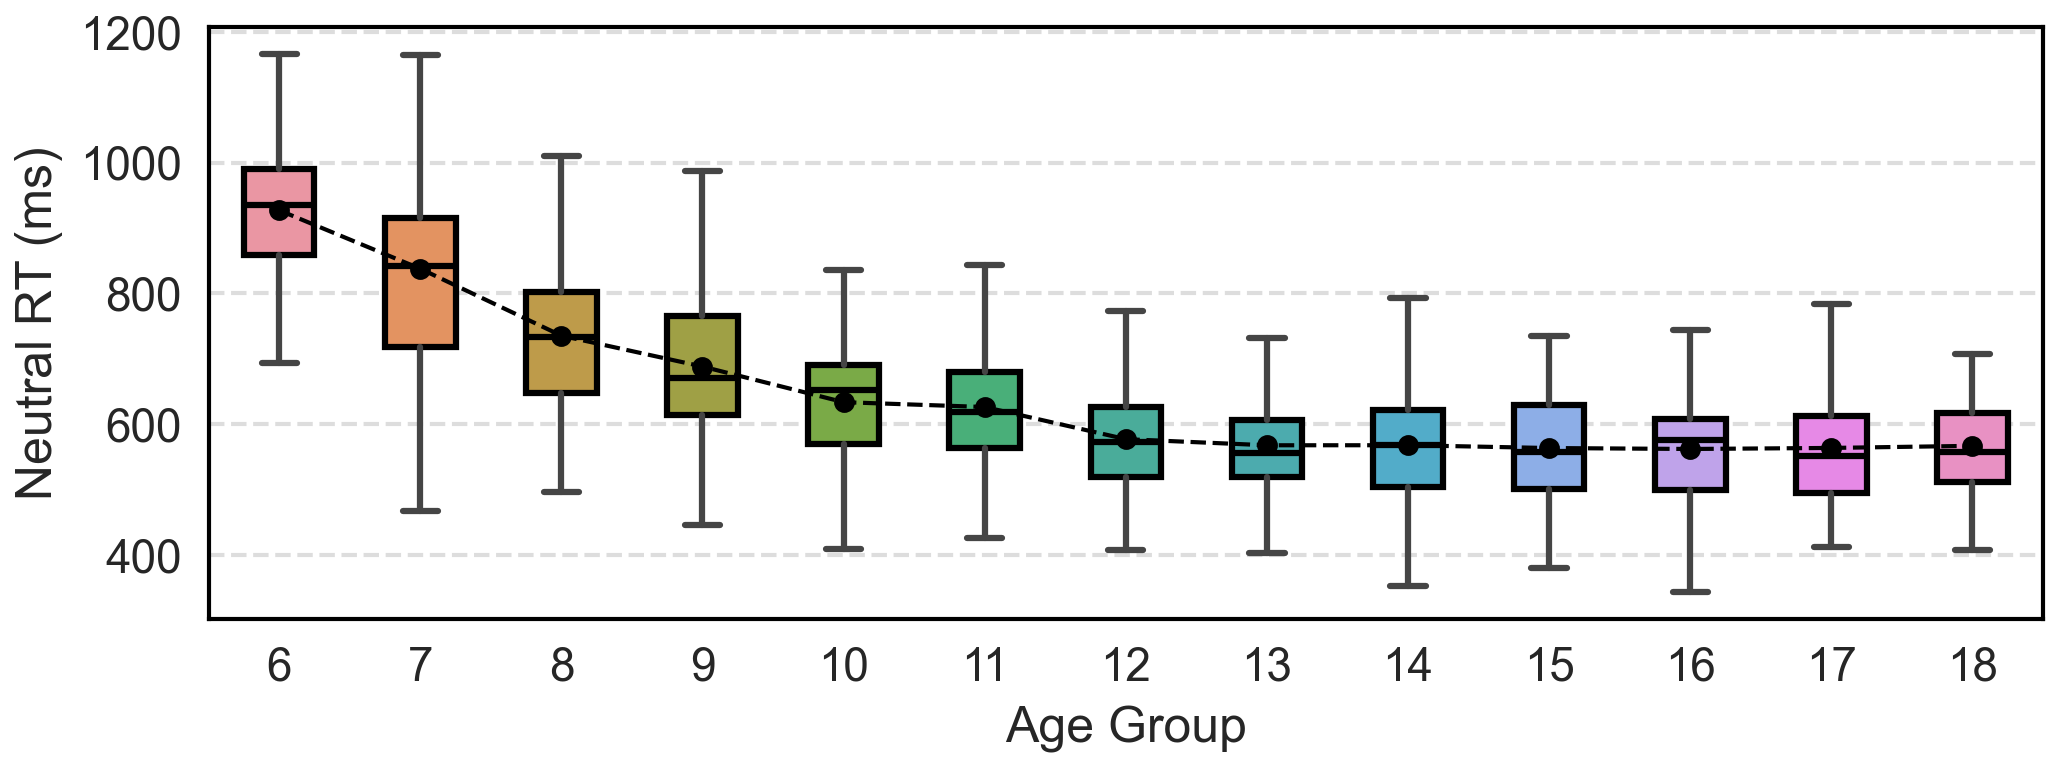

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_46295/327068454.py:197: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xs, means.values, '-o', markersize=4, linewidth=1,


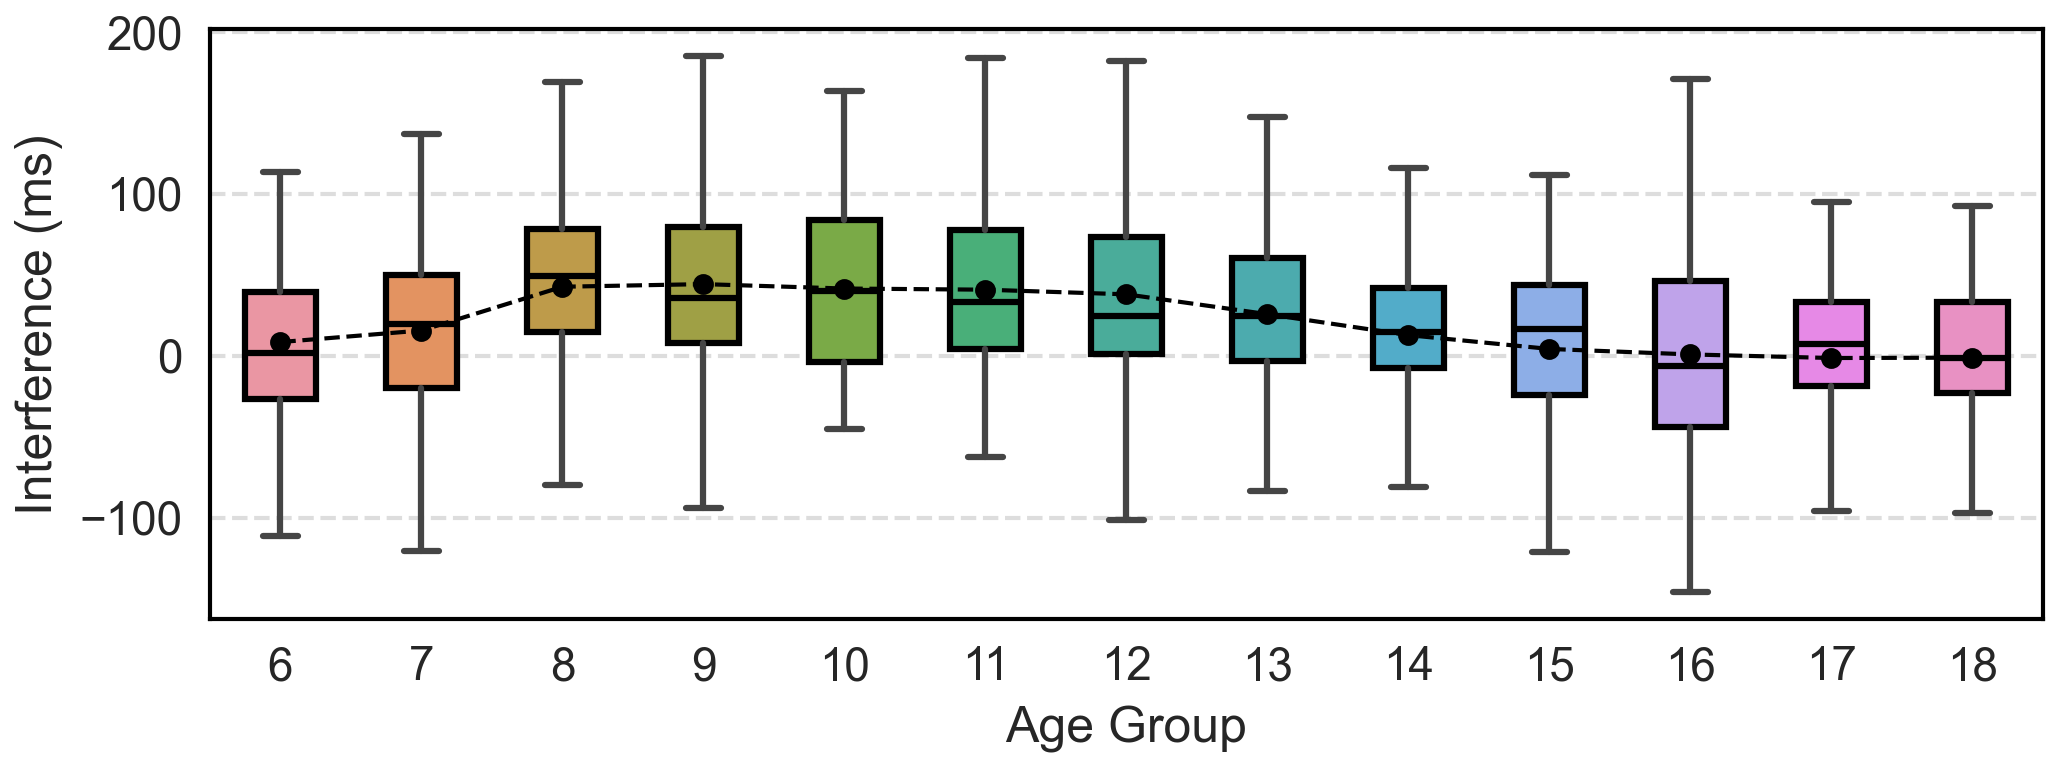

Effect size data saved to ./output/effect_sizes-Stroop.xlsx


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway, ttest_ind
from statsmodels.stats.multitest import multipletests
import os
import matplotlib as mpl

def df_to_markdown_table(df, index_name="Age Group"):
    md = []
    cols = [index_name] + list(df.columns)
    md.append("| " + " | ".join(cols) + " |")
    md.append("|" + "---|" * len(cols))
    for idx, row in df.iterrows():
        vals = [idx] + list(row)
        md.append("| " + " | ".join(str(v) for v in vals) + " |")
    return "\n".join(md)

def main():
    # ================== Nature-style settings ==================
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 8,
        'axes.linewidth': 0.8,
        'xtick.major.size': 3,
        'ytick.major.size': 3,
        'xtick.minor.size': 1.5,
        'ytick.minor.size': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.minor.width': 0.5,
        'ytick.minor.width': 0.5,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.05,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.grid': False
    })
    sns.set_style("whitegrid", {
        'grid.linestyle': '--',
        'grid.color': '#dddddd',
        'axes.edgecolor': '#333333'
    })
    palette = {
        'primary':      "#0072B2",
        'secondary':    "#D55E00",
        'neutral_dark': '#333333'
    }

    # 1. Load per-subject summary
    pivot_df = pd.read_excel('Stroop-baseline.xlsx')
    # Compute interference if not present
    if 'Interference' not in pivot_df.columns:
        pivot_df['Interference'] = pivot_df['Incongruent'] - pivot_df['Congruent']

    # 2. Correlation analysis
    summary = pivot_df.groupby('Subject').agg(
        Mean_Incongruent=('Incongruent','first'),
        Mean_Congruent=('Congruent','first'),
        Mean_Neutral=('Neutral','first'),
        Age=('Age','first')
    ).reset_index()
    n = len(summary)
    r, p = pearsonr(summary['Age'], summary['Mean_Incongruent'])
    z = np.arctanh(r)
    se = 1/np.sqrt(n-3)
    delta = 1.96*se
    r_lower, r_upper = np.tanh(z-delta), np.tanh(z+delta)

    # 3. Plot correlation with marginals (Incongruent)
    fig = plt.figure(figsize=(3.5,3.2))
    gs = fig.add_gridspec(4,4, height_ratios=[0.4,1,1,1], width_ratios=[1,1,1,0.3],
                          hspace=0.05, wspace=0.05)
    ax_top   = fig.add_subplot(gs[0,0:3])
    ax_main  = fig.add_subplot(gs[1:4,0:3])
    ax_right = fig.add_subplot(gs[1:4,3], sharey=ax_main)
    ax_main.scatter(summary['Age'], summary['Mean_Incongruent'],
                    s=16, c=palette['primary'], alpha=0.4,
                    edgecolors='grey', linewidths=0.6, zorder=3)
    # regression + CI
    x,y = summary['Age'].values, summary['Mean_Incongruent'].values
    coeffs = np.polyfit(x,y,1)
    xs = np.linspace(x.min(), x.max(), 100)
    ys = np.polyval(coeffs, xs)
    y_pred = np.polyval(coeffs, x)
    mse = np.mean((y - y_pred)**2)
    se_pred = np.sqrt(mse*(1/len(x) + (xs - x.mean())**2/np.sum((x - x.mean())**2)))
    ci_u, ci_l = ys + 1.96*se_pred, ys - 1.96*se_pred
    ax_main.fill_between(xs, ci_l, ci_u, color=palette['secondary'], alpha=0.3, zorder=2)
    ax_main.plot(xs, ys, color=palette['secondary'], linewidth=1.5, zorder=4)
    # marginals
    ax_top.hist(summary['Age'], bins=18, density=True, alpha=0.3,
                color=palette['primary'], edgecolor='black', linewidth=0.3)
    sns.kdeplot(summary['Age'], ax=ax_top, color=palette['secondary'],
                linewidth=0.7, linestyle='--')
    ax_top.axis('off')
    ax_right.hist(summary['Mean_Incongruent'], bins=18, density=True,
                  orientation='horizontal', alpha=0.3,
                  color=palette['primary'], edgecolor='black', linewidth=0.3)
    sns.kdeplot(summary['Mean_Incongruent'], ax=ax_right,
                color=palette['secondary'], linewidth=0.7,
                vertical=True, linestyle='--')
    ax_right.axis('off')
    ax_main.set_xlabel('Age (years)', fontsize=9, color=palette['neutral_dark'])
    ax_main.set_ylabel('Mean RT (Incongruent, ms)', fontsize=9, color=palette['neutral_dark'])
    ax_main.set_xlim(x.min()-0.5, x.max()+0.5)
    ax_main.set_ylim(y.min()-50, y.max()+50)
    ax_main.tick_params(axis='both', which='major', labelsize=8, colors=palette['neutral_dark'])
    p_text = "$p$ < 0.001" if p<0.001 else f"$p$ = {p:.3f}"
    ax_main.text(0.25, 0.95, f"$r$ = {r:.3f},  {p_text}",
                 transform=ax_main.transAxes, fontsize=8,
                 fontweight='bold', color=palette['neutral_dark'])
    ax_main.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
    for spine in ['left','bottom']:
        ax_main.spines[spine].set_linewidth(0.8)
        ax_main.spines[spine].set_color(palette['neutral_dark'])
    os.makedirs('./output', exist_ok=True)
    plt.savefig('./output/nature_stroop_correlation-main.png', dpi=600)
    plt.show()

    # 4. Descriptive statistics by age group
    data = pivot_df.copy()
    desc = data.groupby('Age Group').agg(
        N=('Subject','nunique'),
        Incongruent_M=('Incongruent','mean'),
        Incongruent_SD=('Incongruent','std'),
        Congruent_M=('Congruent','mean'),
        Congruent_SD=('Congruent','std'),
        Neutral_M=('Neutral','mean'),
        Neutral_SD=('Neutral','std'),
        Interference_M=('Interference','mean'),
        Interference_SD=('Interference','std')
    ).round(2)
    print("### Descriptive Statistics")
    print(df_to_markdown_table(desc), "\n")

    # 5. One-way ANOVA + Eta² for all four metrics
    metrics = ['Incongruent','Congruent','Neutral','Interference']
    age_groups = sorted(data['Age Group'].unique())
    aov_rows = []
    for m in metrics:
        groups = [grp[m].values for _, grp in data.groupby('Age Group')]
        fstat, pval = f_oneway(*groups)
        counts = [len(g) for g in groups]
        means = [np.mean(g) for g in groups]
        grand = data[m].mean()
        ssb = sum(n*(mu-grand)**2 for n,mu in zip(counts,means))
        sst = ((data[m]-grand)**2).sum()
        eta2 = ssb/sst if sst>0 else np.nan
        aov_rows.append({'Metric':m,'F':round(fstat,3),'p':round(pval,4),'Eta2':round(eta2,3)})
    df_aov = pd.DataFrame(aov_rows)
    print("### One-way ANOVA Across Age Groups")
    print(df_aov.to_markdown(index=False), "\n")

    # 6. Pairwise t-tests + FDR + Cohen's d for all metrics
    pairs = [(age_groups[i], age_groups[i+1]) for i in range(len(age_groups)-1)]
    rows = []
    for m in metrics:
        pvals = []
        for g1,g2 in pairs:
            v1 = data.loc[data['Age Group']==g1, m]
            v2 = data.loc[data['Age Group']==g2, m]
            if len(v1)>=2 and len(v2)>=2:
                _, pv = ttest_ind(v1, v2, nan_policy='omit')
                n1,n2 = len(v1), len(v2)
                sd1,sd2 = v1.std(ddof=1), v2.std(ddof=1)
                sp = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2)/(n1+n2-2))
                d = (v1.mean()-v2.mean())/sp if sp>0 else np.nan
            else:
                pv, d, n1, n2 = np.nan, np.nan, len(v1), len(v2)
            pvals.append(pv)
            rows.append({'Metric':m,'Group1':g1,'Group2':g2,
                         'n1':n1,'n2':n2,'p':round(pv,4),'d':round(d,3)})
        mask = ~np.isnan(pvals)
        adj = multipletests(np.array(pvals)[mask], method='fdr_bh')[1]
        it = iter([round(x,4) for x in adj])
        for i in range(len(pairs)):
            rows[-len(pairs)+i]['p_adj'] = next(it) if mask[i] else ''
    df_pair = pd.DataFrame(rows)
    print("### Pairwise t-tests with FDR Correction")
    print(df_pair.to_markdown(index=False), "\n")

    # 7. Boxplots & mean overlays for all metrics
    xs = np.arange(len(age_groups))
    for m, ylabel in zip(metrics,
                         ['Incongruent RT (ms)','Congruent RT (ms)',
                          'Neutral RT (ms)','Interference (ms)']):
        plt.figure(figsize=(7,2.7))
        ax = sns.boxplot(x='Age Group', y=m, data=data, order=age_groups,
                         showfliers=False, width=0.5,
                         boxprops={'edgecolor':'black'},
                         medianprops={'color':'black'})
        means = data.groupby('Age Group')[m].mean().loc[age_groups]
        ax.plot(xs, means.values, '-o', markersize=4, linewidth=1,
                linestyle='--', color='black')
        ax.set(xlabel='Age Group', ylabel=ylabel)
        for sp in ax.spines.values():
            sp.set_linewidth(1); sp.set_color('black')
        plt.tight_layout()
        plt.savefig(f'./output/{m.lower()}_by_agegroup.png', dpi=800, bbox_inches='tight')
        plt.show()

    # 8. Compute effect sizes with 95% CI and save to Excel
    effect_sizes = []
    for m in metrics:
        sub = df_pair[df_pair['Metric']==m].copy()
        ci_lows, ci_highs = [], []
        for _, r in sub.iterrows():
            n1, n2, d = r['n1'], r['n2'], r['d']
            se = np.sqrt((n1 + n2) / (n1 * n2) + d**2 / (2 * (n1 + n2)))
            ci_lows.append(d - 1.96 * se)
            ci_highs.append(d + 1.96 * se)
        sub['CI_Lower'] = ci_lows
        sub['CI_Upper'] = ci_highs
        effect_sizes.append(sub)
    effect_sizes_df = pd.concat(effect_sizes, ignore_index=True)
    effect_sizes_df.to_excel('./output/effect_sizes-stroop.xlsx', index=False)
    print("Effect size data saved to ./output/effect_sizes-Stroop.xlsx")


if __name__ == '__main__':
    main()